In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [4]:
df.shape

(1000, 3)

## Find out the distribution of input features

<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

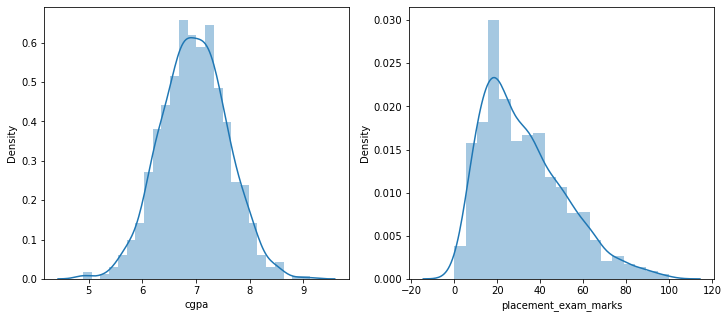

In [12]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

In [16]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<AxesSubplot:xlabel='placement_exam_marks'>

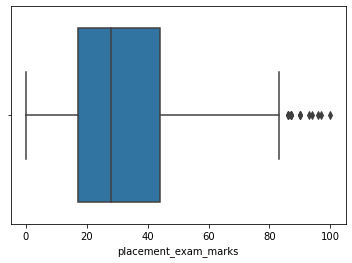

In [17]:
sns.boxplot(df['placement_exam_marks'])

We will consider 'placement_exam_marks' column as the data distribution is skewed.

In [14]:
# Find the Q3 and Q1
Q3 = df['placement_exam_marks'].quantile(0.75)
Q1 = df['placement_exam_marks'].quantile(0.25)

Q3,Q1

(44.0, 17.0)

In [15]:
# Find the IQR
IQR = Q3 - Q1
IQR

27.0

In [18]:
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

print('Upper Limit',upper_limit)
print('Lower Limit',lower_limit)

Upper Limit 84.5
Lower Limit -23.5


## Finding Outliers

In [23]:
df[(df['placement_exam_marks'] > upper_limit) | (df['placement_exam_marks'] < lower_limit)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


## Trim the Outliers

In [24]:
df_outliers = df[(df['placement_exam_marks'] < upper_limit) & (df['placement_exam_marks'] > lower_limit)]

In [25]:
df_outliers.shape

(985, 3)

<AxesSubplot:xlabel='placement_exam_marks'>

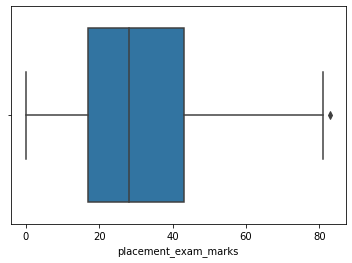

In [31]:
sns.boxplot(df_outliers['placement_exam_marks'])

## Capping the Outliers

In [27]:
new_df_cap = df.copy()
new_df_cap['placement_exam_marks'] = np.where(df['placement_exam_marks'] > upper_limit,
                                              upper_limit,
                                              np.where(
                                                  df['placement_exam_marks'] < lower_limit,
                                                  lower_limit,
                                                  df['placement_exam_marks']))

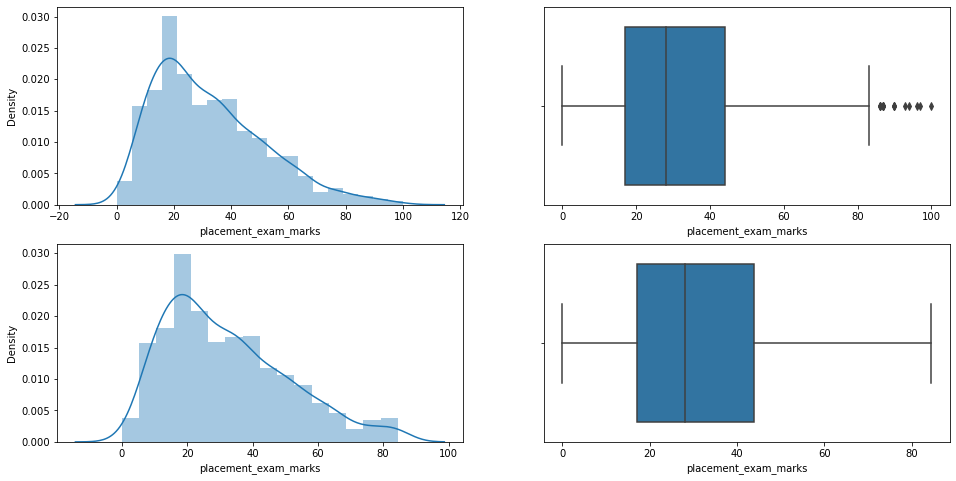

In [29]:
# Camparision before and after handling outliers 

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()